In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PowerTransformer

from sklearn.preprocessing import StandardScaler

In [7]:
df = pd.read_excel('ENB2012_data.xlsx')

In [8]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [12]:
df.shape

(768, 10)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [13]:
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

No null values

In [14]:
# checking for any duplicated row
df.loc[df.duplicated()]

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2


In [15]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [21]:
df_corr = df.corr()
df_corr

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889430,0.895785
X6,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290
X7,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269842,0.207505
X8,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
Y1,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-2.586763e-03,2.698417e-01,8.736846e-02,1.000000,0.975862
Y2,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


<Axes: >

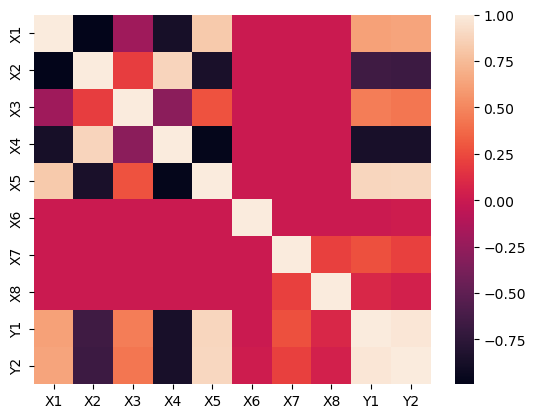

In [20]:
sns.heatmap(df_corr, annot = False)

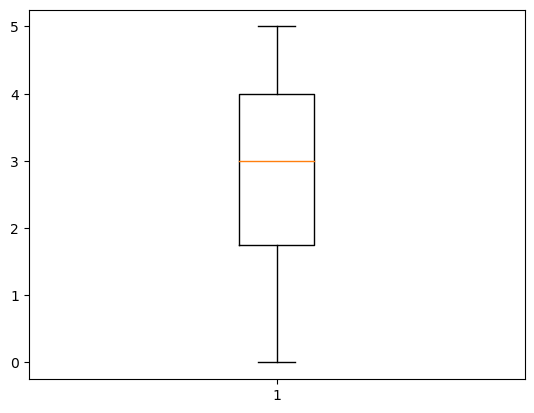

In [37]:
plt.boxplot(df['X8'])
plt.show()

checked for all parameters. No outlier detected

In [42]:
x = df.drop(columns = ['Y1', 'Y2'])
y = df['Y1']

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 2)

In [44]:
pt1 = PowerTransformer()

x_train_transformed = pt1.fit_transform(x_train)
x_test_transformed = pt1.transform(x_test)
x_train_transformed = pd.DataFrame(x_train_transformed,columns=x_train.columns)

In [51]:
x_train_transformed.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,-0.077260,0.116784,-1.917452,0.953770,-0.977453,0.487275,1.254355,-0.485888
1,-1.598686,1.606762,1.117625,0.953770,-0.977453,-0.396083,0.141763,0.159288
2,-1.598686,1.606762,1.117625,0.953770,-0.977453,1.308792,1.254355,-0.485888
3,0.412975,-0.444467,0.638273,-0.690882,1.023067,-0.396083,-0.981955,0.783540
4,0.675199,-0.717284,0.107068,-0.690882,1.023067,-0.396083,1.254355,-0.485888


In [45]:
x_train_transformed.skew(axis = 0)

X1    0.084834
X2   -0.071384
X3    0.004502
X4   -0.189104
X5    0.045726
X6   -0.076801
X7   -0.044584
X8   -0.158219
dtype: float64

## Linear regresssion from scratch 

In [116]:
theta = np.zeros((x_train_transformed.shape[1], 1)) 

alpha = 0.01 
epochs = 10000  

m = len(y_train)  
cost_history = []

for _ in range(epochs):
    predictions = x_train_transformed @ theta
    y_train = y_train.reshape(614,1)

    error = predictions - y_train

    gradient =  (x_train_transformed.T @ error)
    gradient *= 1/m
    theta -= alpha * gradient

    cost = (1 / (2 * m)) * np.sum(error ** 2)
    cost_history.append(cost)

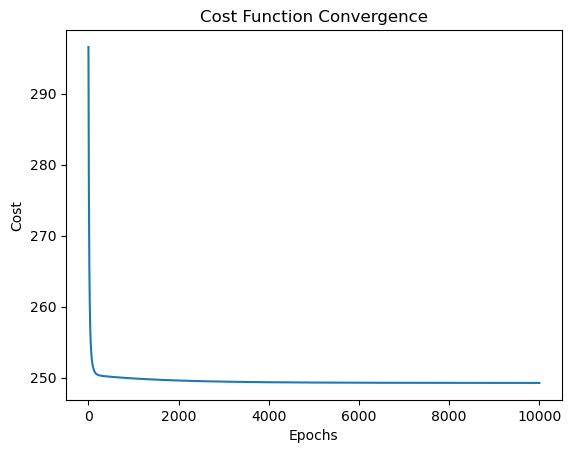

In [81]:
plt.plot(range(epochs), cost_history)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")
plt.show()

In [93]:
predictions = x_test_transformed @ theta
mse = np.mean((predictions - y) ** 2)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2}")

Mean Squared Error: 289.5714009274877
R-squared: -4.139010650694334


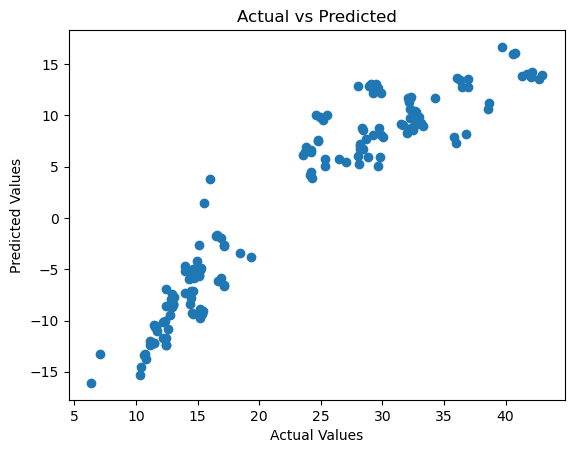

In [90]:
plt.scatter(y_test, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

In [84]:
x_test_transformed = pd.DataFrame(x_test_transformed, columns = x_train_transformed.columns)

## Linear regression from sckit learn

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [86]:
model = LinearRegression()

model.fit(x_train_transformed, y_train)

LinearRegression()

In [87]:
y_pred = model.predict(x_test_transformed)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


Mean Squared Error: 9.978327310504575
R-squared: 0.8929045778064206


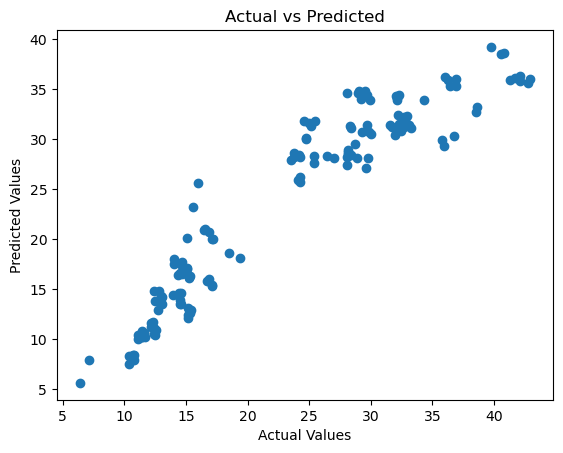

In [88]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

## Ridge regression

In [94]:
from sklearn.linear_model import Ridge, Lasso

In [100]:
ridge_model = Ridge(alpha=1.0)

ridge_model.fit(x_train_transformed, y_train)
y_pred_ridge = ridge_model.predict(x_test_transformed)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_ridge)}")
print(f"R-squared: {r2_score(y_test, y_pred_ridge)}")

Mean Squared Error: 10.16296200523002
R-squared: 0.8909229299843064


Text(0.5, 1.0, 'Ridge Regression: Actual vs Predicted')

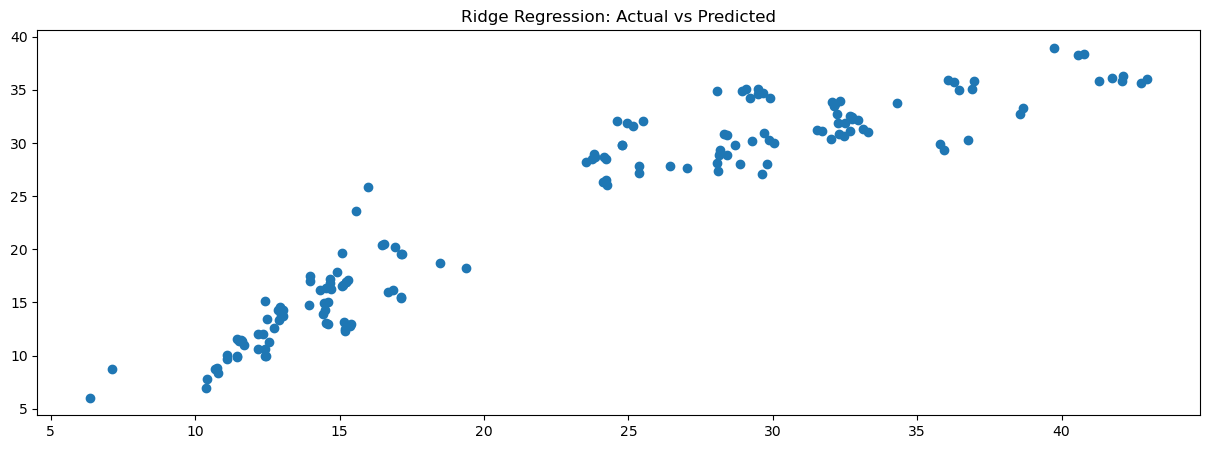

In [113]:
fig, axs = plt.subplots(figsize=(15, 5))
axs.scatter(y_test, y_pred_ridge)
axs.set_title("Ridge Regression: Actual vs Predicted")


## Lasso regression

In [106]:
lasso_model = Lasso(alpha=1.0)

lasso_model.fit(x_train_transformed, y_train)

y_pred_lasso = lasso_model.predict(x_test_transformed)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_lasso)}")
print(f"R-squared: {r2_score(y_test, y_pred_lasso)}")

Mean Squared Error: 11.663428065525348
R-squared: 0.8748187232155731


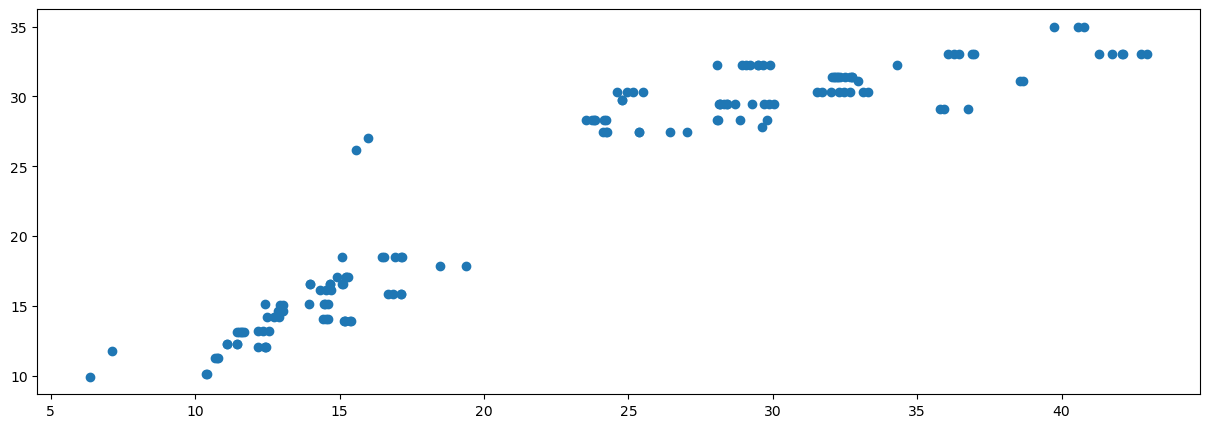

In [114]:
fig, axs = plt.subplots(figsize=(15, 5))
axs.scatter(y_test, y_pred_lasso)